In [6]:
!pip install textblob matplotlib wordcloud
!python -m textblob.download_corpora


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.9 MB/s eta 0:00:00
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [8]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

In [10]:
reviews = [
    "I absolutely love this product! Works like a charm.",
    "This is the worst purchase I've ever made.",
    "It's okay, nothing special but not bad either.",
    "Highly recommend to anyone looking for quality!",
    "Terrible service. Not buying again.",
    "Great value for the price.",
    "I feel neutral about this product.",
]

In [12]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

In [14]:
df = pd.DataFrame(reviews, columns=["Review"])
df["Sentiment"] = df["Review"].apply(get_sentiment)

In [16]:
print(df)

                                              Review Sentiment
0  I absolutely love this product! Works like a c...  Positive
1         This is the worst purchase I've ever made.  Negative
2     It's okay, nothing special but not bad either.  Positive
3    Highly recommend to anyone looking for quality!  Positive
4                Terrible service. Not buying again.  Negative
5                         Great value for the price.  Positive
6                 I feel neutral about this product.   Neutral


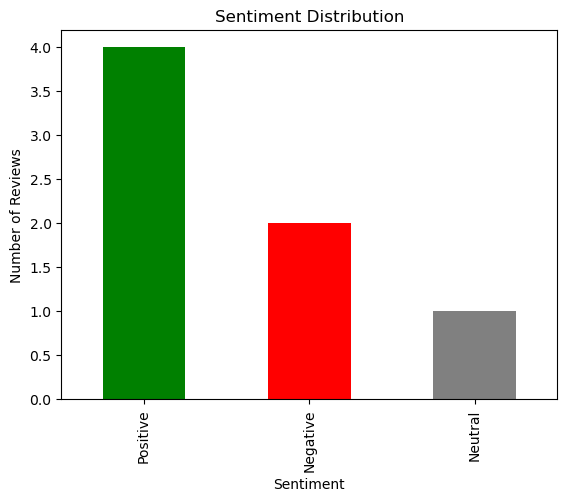

In [18]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts.plot(kind="bar", color=["green", "red", "gray"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

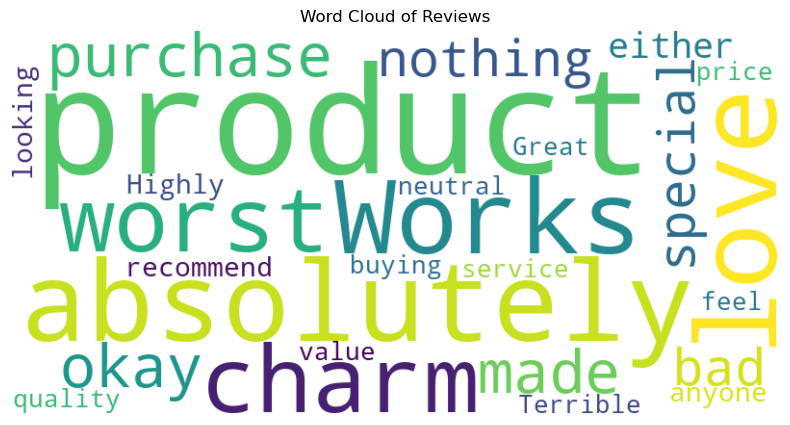

In [20]:
all_text = " ".join(review for review in df["Review"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()